In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Introduce random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# In[6]:


from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Autoencoder architecture
input_img = Input(shape=(28, 28))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


# In[7]:


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))


# In[8]:


decoded_imgs = autoencoder.predict(x_test_noisy)


# In[9]:


from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Autoencoder architecture with convolutional layers
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)


# In[10]:


import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Reconstructed Images')
plt.show()


Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.2493 - accuracy: 0.9251 - val_loss: 0.1084 - val_accuracy: 0.9670
Epoch 2/20
469/469 [==============================] - 10s 20ms/step - loss: 0.1001 - accuracy: 0.9691 - val_loss: 0.0846 - val_accuracy: 0.9731
Epoch 3/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0711 - accuracy: 0.9776 - val_loss: 0.0679 - val_accuracy: 0.9784
Epoch 4/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0577 - accuracy: 0.9813 - val_loss: 0.0657 - val_accuracy: 0.9796
Epoch 5/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 0.0700 - val_accuracy: 0.9792
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0388 - accuracy: 0.9868 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0356 - accuracy: 0.9880 - val_loss: 0.0716 - val_accuracy: 

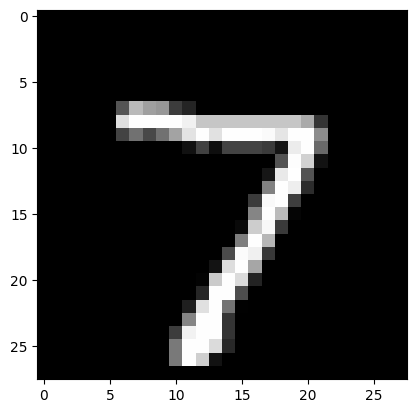

1/1 [==============================] - 0s 64ms/step
Model prediction: 7
Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0726 - val_accuracy: 0.9852
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0697 - val_accuracy: 0.9869
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0727 - val_accuracy: 0.9858
Epoch 4/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0723 - val_accuracy: 0.9860
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0758 - val_accuracy: 0.9860
Epoch 6/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0751 - val_accuracy: 0.9865
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - l

In [17]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
# loading mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# converting class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# to create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# to train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)
# to plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()
# making a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))


In [18]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv("diabetes.csv", header=None).values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:, 0:8], dataset[:, 8], test_size=0.25, random_state=87)

# Set random seed for reproducibility
np.random.seed(155)

np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.add(Dense(2, activation='relu')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Saving Breas Cancer.csv to Breas Cancer (3).csv
Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 7.6544 - acc: 0.6615
Epoch 11/10

In [11]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 26ms/step - loss: 0.2868 - accuracy: 0.9121 - val_loss: 0.1976 - val_accuracy: 0.9383
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0998 - accuracy: 0.9693 - val_loss: 0.1237 - val_accuracy: 0.9608
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0787 - val_accuracy: 0.9746
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0630 - val_accuracy: 0.9799
Epoch 5/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0767 - val_accuracy: 0.9789
Epoch 6/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0642 - val_accuracy: 0.9802
Epoch 7/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0707 - val_acc